## Problem 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

article = pd.read_csv("articleInfo.csv")
author = pd.read_csv("authorInfo.csv")

### Merge “articleInfo.csv” and “authorInfo.csv”

In [2]:
merge = article.merge(author, left_on="Article No.", right_on="Article No.", how="outer")

#replace NaN with 0's
merge.replace(np.nan, 0)

#clean up country name typos
merge['Country'] = merge['Country'].str.replace('Spain ', 'Spain')
merge['Country'] = merge['Country'].str.replace('Chian', 'China')
merge['Country'] = merge['Country'].str.replace('Denamrk', 'Denmark')
merge['Country'] = merge['Country'].str.replace('Denmark ', 'Denmark')
merge['Country'] = merge['Country'].str.replace('Chile ', 'Chile')
merge['Country'] = merge['Country'].str.replace('Israel ', 'Israel')
merge['Country'] = merge['Country'].str.replace('Bristol', 'United Kingdom')
merge['Country'] = merge['Country'].str.replace('Korea', 'South Korea')


merge.sort_values(by=['Year'])

,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type,Author Name,Author Affiliation,Country,h-index
371,79,The Effectiveness of Virtual and Augmented Rea...,2017,4.0,"gross anatomy education, health sciences educa...",662.0,ANATOMICAL SCIENCES EDUCATION,Although cadavers constitute the gold standard...,Journal,Maria Christofi,Cyprus University of Technology,Cyprus,8.0
176,36,Spatial Learning and Wayfinding in an Immersiv...,2017,3.0,NaN,10.0,CYBERPSYCHOLOGY BEHAVIOR AND SOCIAL NETWORKING,Previous work has examined whether immersive t...,Journal,Ruth Weaver,Plymouth University,United Kingdom,NaN
175,36,Spatial Learning and Wayfinding in an Immersiv...,2017,3.0,NaN,10.0,CYBERPSYCHOLOGY BEHAVIOR AND SOCIAL NETWORKING,Previous work has examined whether immersive t...,Journal,Simone Schnall,University of Cambridge,United Kingdom,NaN
443,137,Immersive virtual reality as a teaching tool f...,2017,7.0,anatomy; education; medical student; motivatio...,233.0,International Forum of Allergy & Rhinology,Background Three-dimensional (3D) computer mod...,Journal,NaN,NaN,NaN,NaN
374,79,The Effectiveness of Virtual and Augmented Rea...,2017,4.0,"gross anatomy education, health sciences educa...",662.0,ANATOMICAL SCIENCES EDUCATION,Although cadavers constitute the gold standard...,Journal,Andri Ioannou,Cyprus University of Technology,Cyprus,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,37,Geography Education in a Collaborative Virtual...,2022,12.0,collaborative immersive virtual environments; ...,1.0,ISPRS INTERNATIONAL JOURNAL OF GEO-INFORMATION,The presented study aspires to utilize the gra...,Journal,Katerina Jochecova,Masaryk University,Czech Republic,NaN
188,37,Geography Education in a Collaborative Virtual...,2022,12.0,collaborative immersive virtual environments; ...,1.0,ISPRS INTERNATIONAL JOURNAL OF GEO-INFORMATION,The presented study aspires to utilize the gra...,Journal,Michal Cerny,Masaryk University,Czech Republic,NaN
187,37,Geography Education in a Collaborative Virtual...,2022,12.0,collaborative immersive virtual environments; ...,1.0,ISPRS INTERNATIONAL JOURNAL OF GEO-INFORMATION,The presented study aspires to utilize the gra...,Journal,"Šašinka, Čenek",Masaryk University,Czech Republic,NaN
214,44,IMMERSIVE VIRTUAL REALITY (VR) FOR LEARNING IN...,2022,NaN,NaN,NaN,EGA-REVISTA DE EXPRESION GRAFICA ARQUITECTONICA,The use of virtual reality (VR) in project des...,Journal,Zuzana Palková,Slovak University of Agriculture in Nitra,Czech Republic,10.0


### 1.1 Plot the yearly_publication figure, in which the x-axis is the year, the y-axis is the number of articles published during that year.

<AxesSubplot: title={'center': 'Article Count per Year'}, xlabel='Year', ylabel='Article Count'>

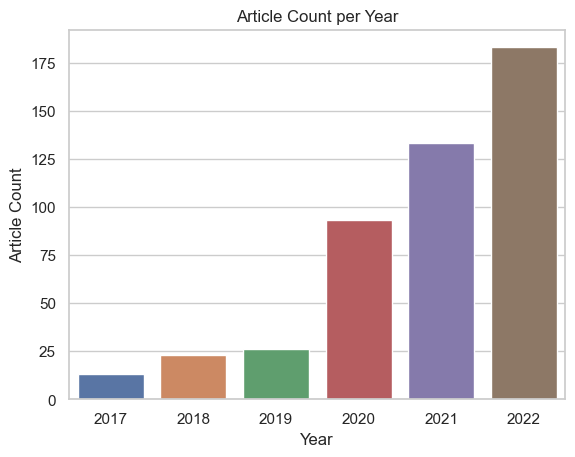

In [3]:
sns.set_theme(style="whitegrid")

plot1 = sns.countplot(x=merge["Year"])
plot1.set(ylabel="Article Count", title = "Article Count per Year")
plot1

### 1.2 Plot the yearly_citation figure, in which the x-axis is the year, the y-axis is the total number of citations during that year.

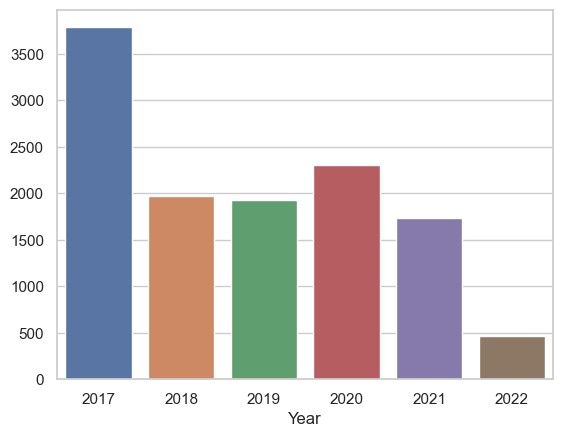

In [4]:
summed_year = merge.groupby('Year')["Citation"].sum() #becomes a pandas series
plot2 = sns.barplot(x= summed_year.index, y=summed_year.values)

### 1.3 Plot the figure of the number of publications across countries

In [5]:
#packages
!pip install folium
!pip install geopy

In [6]:
# make df showing each country with number of publications
country_pubs = merge["Country"].value_counts()
countries = country_pubs.to_frame()
countries = countries.reset_index(level = 0)
countries.columns = ['Country', 'Count']

countries

,Country,Count
0,USA,62
1,China,35
2,United Kingdom,31
3,Germany,26
4,Spain,19
5,Italy,19
6,Ireland,17
7,South Africa,17
8,Czech Republic,15
9,Taiwan,13


In [7]:
from geopy.geocoders import Nominatim
import geopy
user_agent: geopy.geocoders.options.default_user_agent = "gabriel"
geolocator = Nominatim(user_agent="gabriel")

In [8]:
# get coordinates for center point of each country (a little slow, may timeout)
coords = []
for i in countries.Country:
    temp = geolocator.geocode(i)
    coords.append([temp.latitude, temp.longitude])
    
coordinates = pd.DataFrame(coords, columns = ['Latitude', 'Longitude'])
countries = pd.concat([countries,coordinates], axis = "columns")
countries

,Country,Count,Latitude,Longitude
0,USA,62,39.783730,-100.445882
1,China,35,35.000074,104.999927
2,United Kingdom,31,54.702354,-3.276575
3,Germany,26,51.163818,10.447831
4,Spain,19,39.326068,-4.837979
5,Italy,19,42.638426,12.674297
6,Ireland,17,52.865196,-7.979460
7,South Africa,17,-28.816624,24.991639
8,Czech Republic,15,49.743905,15.338106
9,Taiwan,13,23.973937,120.982018


In [9]:
import folium
from folium.plugins import MarkerCluster

# make world map to show country locations and publications
world_map = folium.Map(tiles="cartodbpositron")

marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(countries)):
    lat = countries.iloc[i]['Latitude']
    long = countries.iloc[i]['Longitude']
    radius = 7
    popup_text = """Country : {}<br><br> # of Publications : {}<br>"""
    popup_text = popup_text.format(countries.iloc[i]['Country'], countries.iloc[i]['Count'])
    folium.CircleMarker(location = [lat, long], radius = radius, popup = popup_text, fill = True).add_to(marker_cluster)

world_map
#click on country to see name and publication count

### 1.4 What are the top 5 institutions that have the most published articles in this area?

In [10]:
top5 = merge[['Author Affiliation']]
top5.value_counts()[0:5]

Author Affiliation                 
University of the Western Cape         17
Masaryk University                     12
University College Cork                11
Intel Corporation                      11
The Chinese University of Hong Kong     8
dtype: int64

### 1.5 Who are the top 5 researchers that have the most h-index in this area?

In [11]:
researchers = merge[['Author Name', 'h-index']]
researchers = researchers.dropna()
researchers.groupby('Author Name').sum().reset_index().sort_values("h-index", ascending = False)[0:5]

,Author Name,h-index
87,Ulrich Trautwein,95.0
61,Nicolas Molinari,63.0
32,George S. Athwal,59.0
79,Sellappan Palaniappan,48.0
51,Maria Luisa Lorusso,33.0


## Problem 2

In [12]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv("data.csv")
df = df.drop('Unnamed: 6', axis = 1)

In [13]:
x_df = df[['Purchase', 'Gender', 'Duration', 'ASR_Error', 'Intent_Error']] #predictor variables
y_df = df[['SUS']] #dependent variable

x,y = np.array(x_df), np.array(y_df)

x_ = PolynomialFeatures(degree=2).fit_transform(x)

model = LinearRegression()
model.fit(x_,y)
model.score(x_, y)

0.6350500497505165

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(x_, y, test_size = 0.25 , random_state = 57)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

### 2.1 Show the statistical results of your trained regression model.

In [15]:
print("The R square score of 2-order polynomial regression model is: ", plr.score(X_test,Y_test))

The R square score of 2-order polynomial regression model is:  0.5752803243983269


In [16]:
#MSE and MAE
mean_squared_error(Y_test, Y_test_pred), mean_absolute_error(Y_test, Y_test_pred)

(95.37097304422596, 6.775894558904611)

### 2.2 What features are significant? What features are insignificant?

In [17]:
df.corr(method='pearson')['SUS'].sort_values() # pearson: standard correlation coefficient

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64

#### It seems that Purchase is the only feature with a strong POSITIVE correlation, while ASR_Error and Intent_Error both have a strong NEGATIVE correlation

In [18]:
x_df = sm.add_constant(x_df)

model = sm.OLS(y_df, x_df).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        22:34:24   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

#### We can see from P > | t | that both ASR_Error and Intent_Error are statistically significant, while Purchase, Gender, and Duration are not

### 2.3 Were the results what you expected? Explain why or why not, for each feature. 

Purchase: No. I believed that since Purchase had a decently strong correlation value of around 0.66, it would be significant in the data, however it came out to be 4th out of the 5 in P-value significance
<br>Gender: Yes. Gender barely offered any correlation value, and ended up not being significant. I didn't believe gender would play a part in SUS scores.
<br>Duration: Yes. With the weakest correlation, I was correct that it would be not significant.
<br>ASR_Error: No. With my use of Siri, it almost never gets my speech wrong, and was surprised how significant the data was for this survey.
<br>Intent_Error: Yes. Again with my use of Siri, I knew it was a weak virtual assistant was expecting it to be a large cause for the SUS score.

### 2.4 What does the model suggest is the most influential factor on SUS? Explain what tells you this is the most influential factor statistically.

In [19]:
model.tvalues

const           16.787968
Purchase         0.364822
Gender           0.424627
Duration        -0.024690
ASR_Error       -3.552555
Intent_Error    -4.571663
dtype: float64

In [20]:
model.pvalues

const           4.867647e-30
Purchase        7.160639e-01
Gender          6.720786e-01
Duration        9.803546e-01
ASR_Error       5.986463e-04
Intent_Error    1.471763e-05
dtype: float64

In [21]:
model.params #standardized coefficients

const           93.028195
Purchase         1.341201
Gender           0.836732
Duration        -0.000241
ASR_Error       -1.425387
Intent_Error    -2.009207
dtype: float64

We can see from the statistics of the model that it suggests that Intent_Error is the most influential factor on SUS. Intent_Error has the largest magnitude standardized coefficient, meaning it influences the most mean change of the dependent variable. It also has the greatest magnitude t-value and the smallest p-value.

### 2.5 What are the potential reasons for these factor(s) being significant predictors of SUS?

SUS is a System Usability Survey. It is scored based on the success and usability of Siri in this case. Purchase had a strong correlation to SUS because SUS would NOT be filled out if Siri was just never used. Intent_Error and ASR_Error show the most statistical significance because they are pretty much the only real variables that affect USABILITY. Since these variables are measures of failure, they would surely affect the score of a usability survey in a negative fashion, hence the negative correlation for both variables.

# Problem 3

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
new_df = df.drop('Unnamed: 6', axis = 1)
new_df.isna().sum()

Purchase        0
SUS             0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

In [68]:
X = new_df.drop(['SUS','Purchase'], axis = 1).to_numpy()
y = new_df['Purchase'].to_numpy()

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [60]:
lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

In [97]:
scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.45) #default test size is 0.25

In [98]:
lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
scaled_X

array([[ 1.02926748, -0.85096294, -0.7083478 , -1.09353868],
       [ 0.95674737, -0.85096294,  0.09659288,  1.11244713],
       [-0.30717444,  1.1751393 ,  0.09659288,  0.7973063 ],
       [-1.37425597, -0.85096294,  1.43816069,  0.48216547],
       [ 1.1121476 , -0.85096294, -0.97666136, -0.77839785],
       [-0.43149462,  1.1751393 ,  0.63322   ,  1.11244713],
       [-0.65941495,  1.1751393 ,  0.09659288, -0.77839785],
       [-1.12561562, -0.85096294,  0.09659288,  1.74272878],
       [-0.23465434, -0.85096294,  0.90153357,  1.11244713],
       [ 0.36622653, -0.85096294,  1.43816069, -0.46325702],
       [-0.08961413, -0.85096294,  0.90153357,  0.48216547],
       [ 0.73918706, -0.85096294, -0.44003424, -0.46325702],
       [-1.0427355 ,  1.1751393 ,  0.36490644,  1.11244713],
       [-0.52473475, -0.85096294, -0.97666136, -0.77839785],
       [ 1.42294804, -0.85096294,  0.36490644, -0.77839785],
       [-0.29681443, -0.85096294,  0.63322   ,  1.11244713],
       [-0.02745404,  1.

In [99]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.92      0.96      0.94        25

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.96      0.96      0.96        25

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.92      0.96      0.94        25

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

              preci

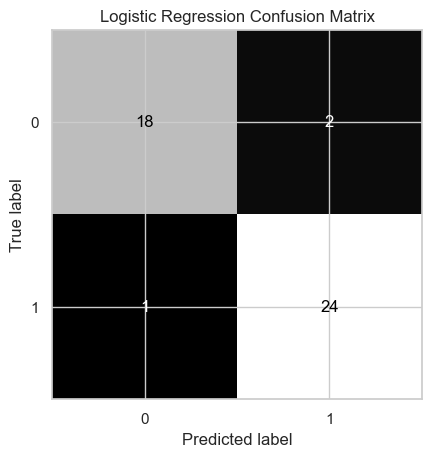

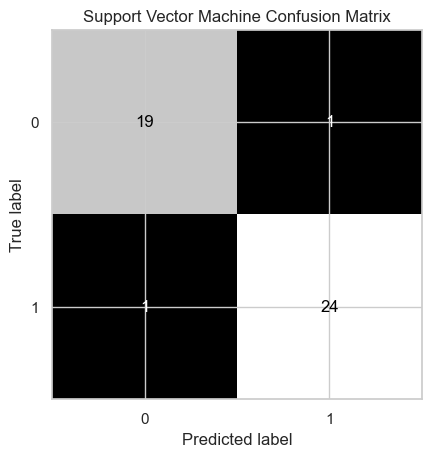

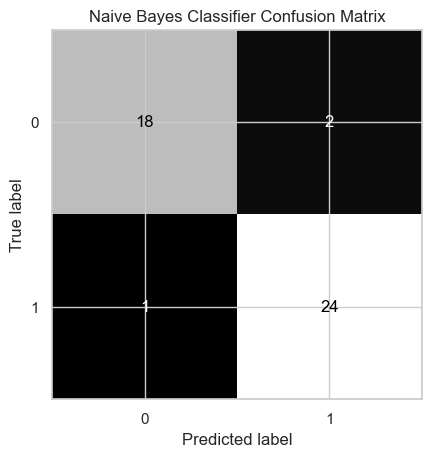

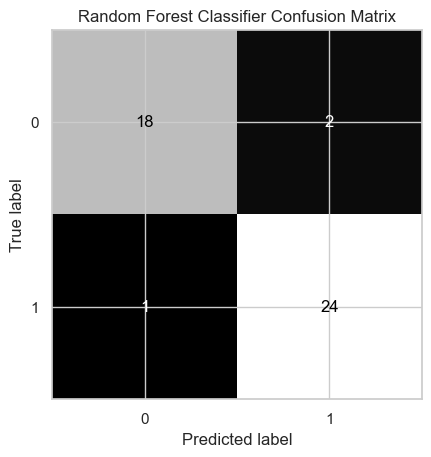

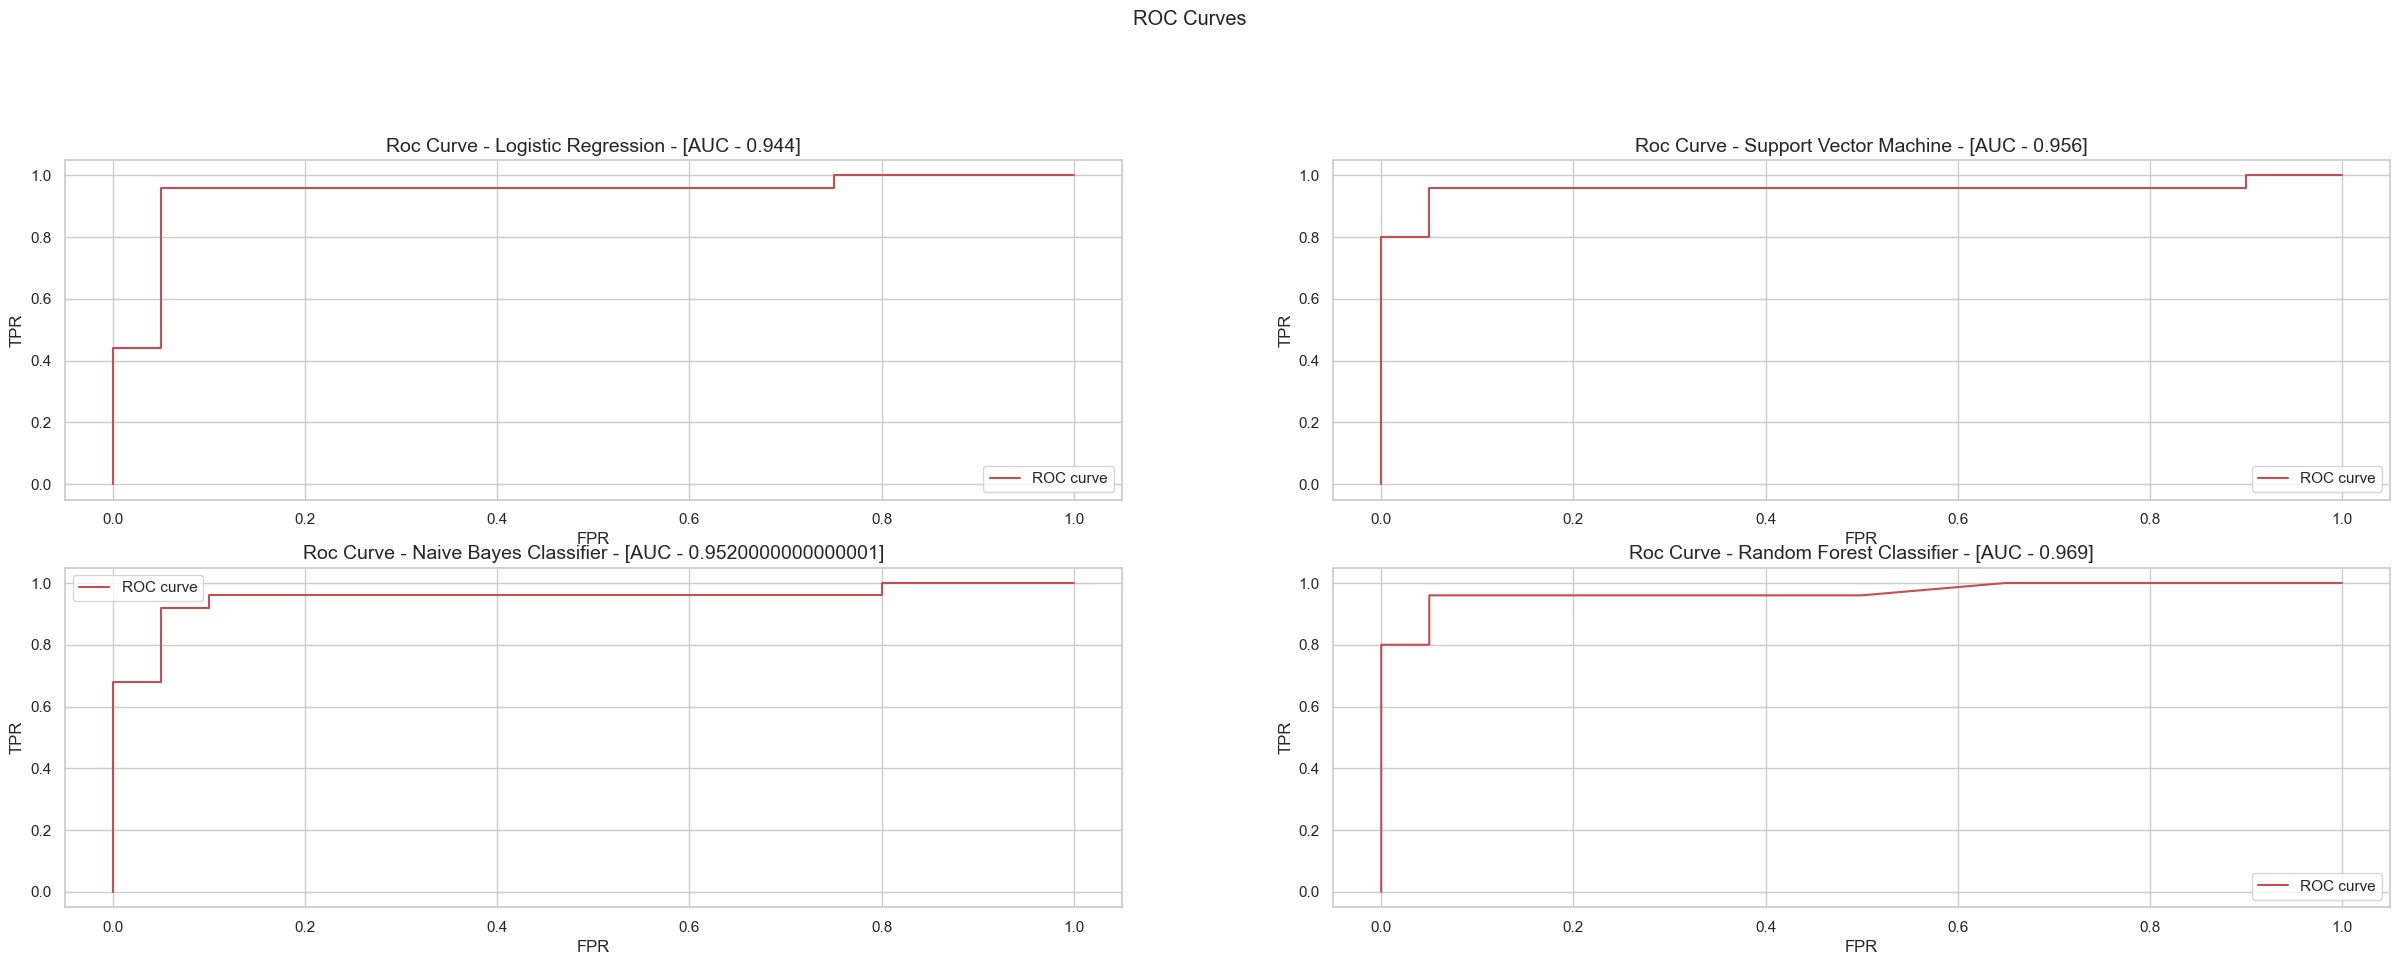

In [100]:
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()

## Maybe its overfitting?... lets try imblearn over-sampling

In [74]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
over_sampled_X_train, over_sampled_y_train = oversample.fit_resample(X_train, y_train)

In [75]:
lc.fit(over_sampled_X_train, over_sampled_y_train)
svc.fit(over_sampled_X_train, over_sampled_y_train)
nbc.fit(over_sampled_X_train, over_sampled_y_train)
rfc.fit(over_sampled_X_train, over_sampled_y_train)

RandomForestClassifier()

In [77]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.93      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.93      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.93      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              preci

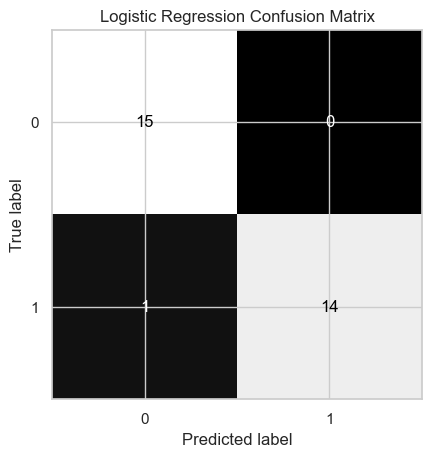

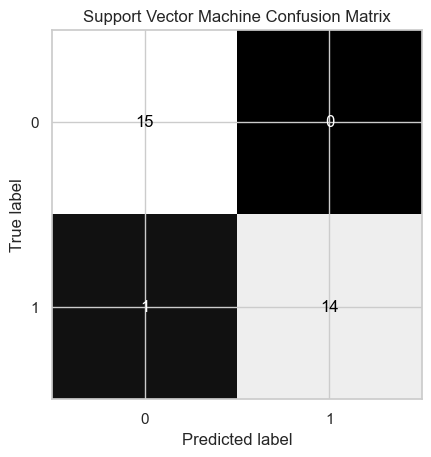

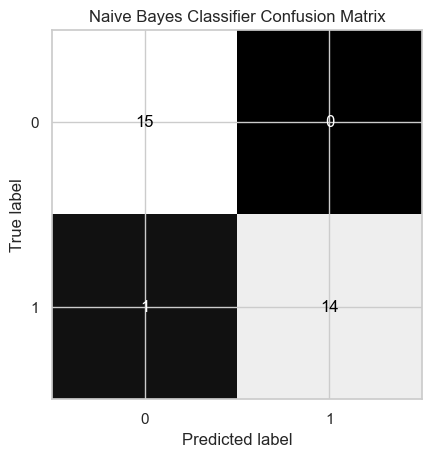

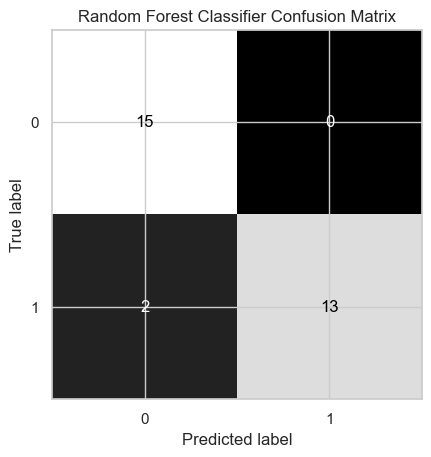

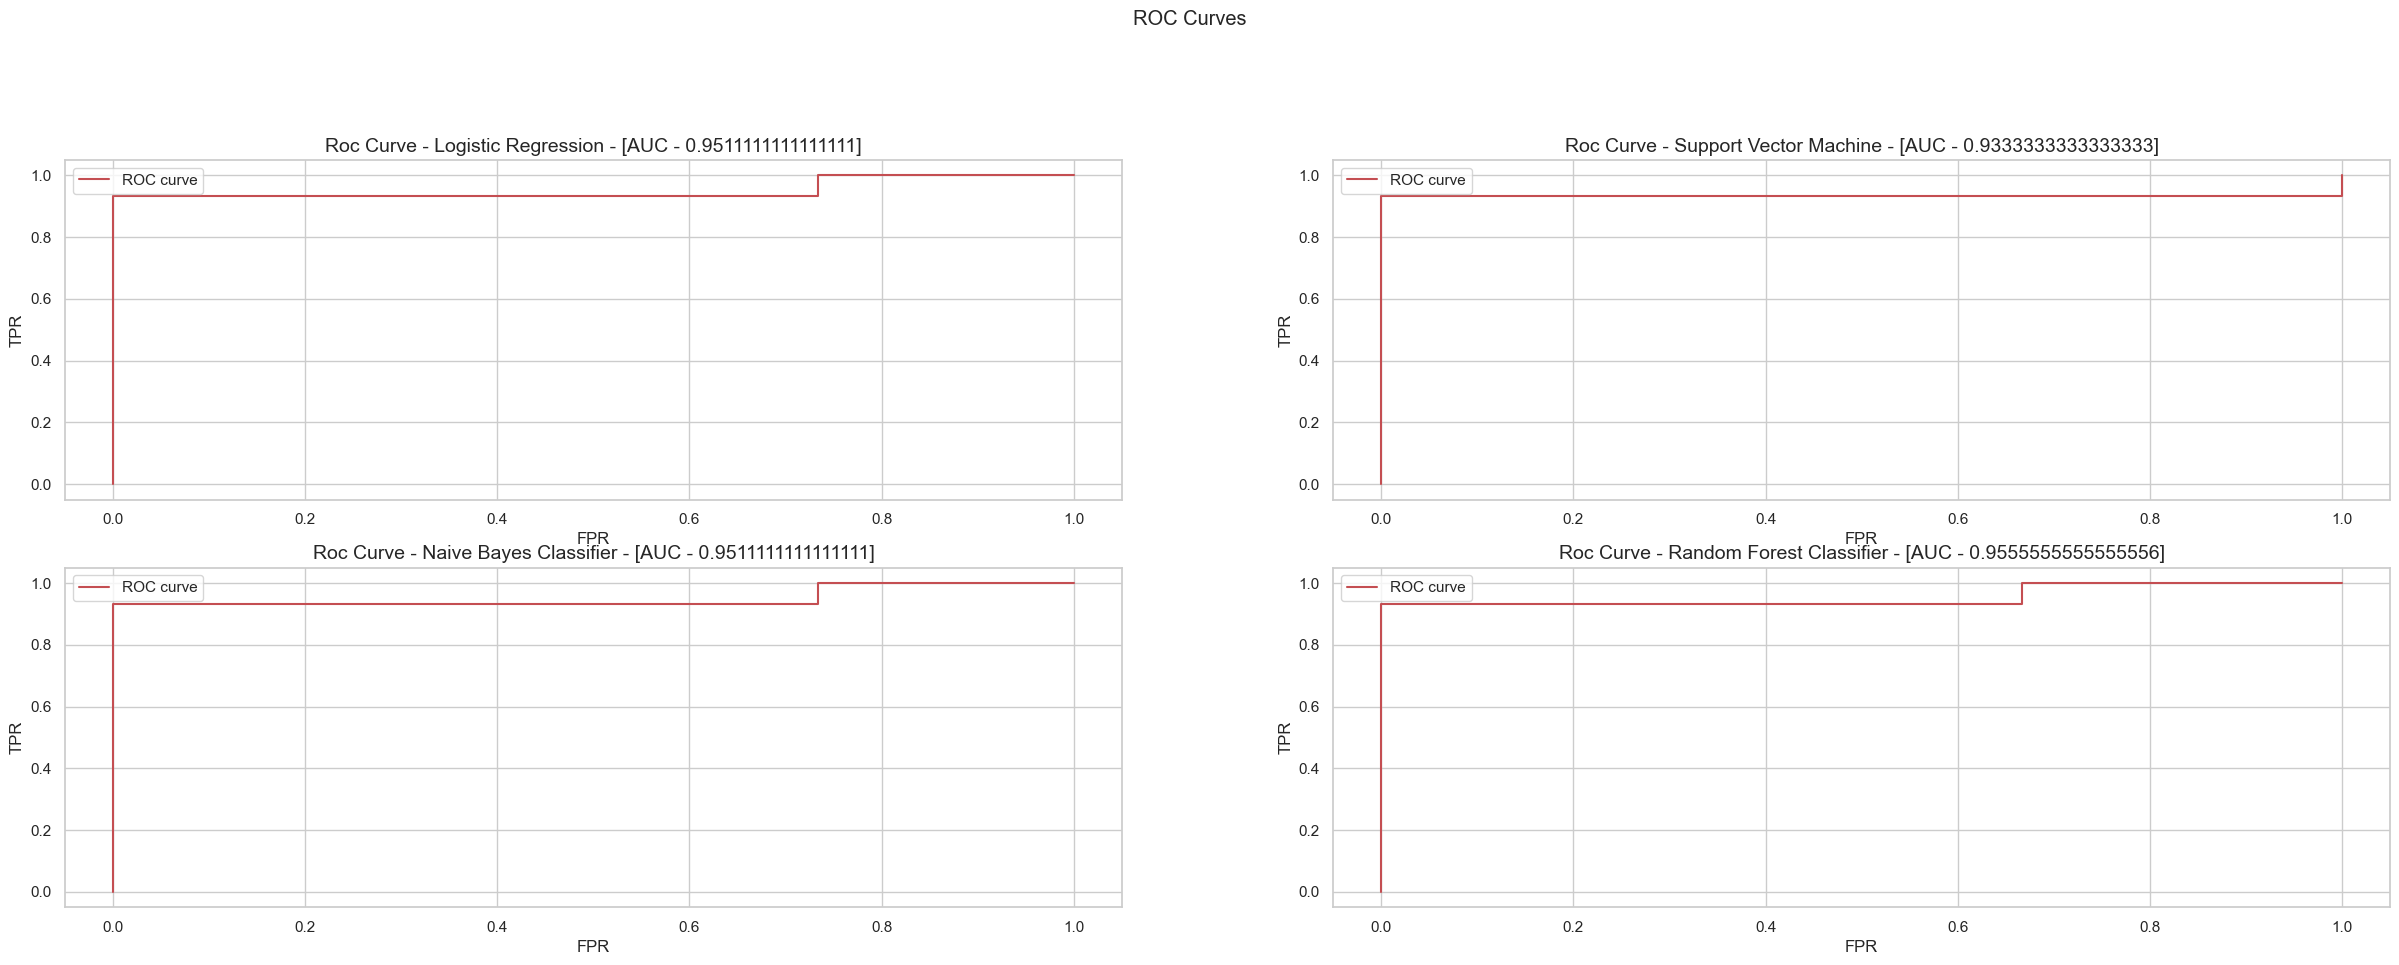

In [80]:
models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba,  y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()